In [65]:
#Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split,KFold,cross_val_score,GridSearchCV,RandomizedSearchCV
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
sns.set(rc={'figure.figsize':(8,8)})

import warnings
warnings.filterwarnings('ignore')

In [66]:
code= pd.read_csv('CarPrice_data.csv')

In [67]:
code.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


# Droping  car Id

In [68]:
code=code.drop(['car_ID'],axis=1) 

# Extracting car company from car name because they are merged togther 

In [69]:
code['CarBrand']=[x.split()[0].title() for x in code.CarName]
code['CarBrand'].head()


0    Alfa-Romero
1    Alfa-Romero
2    Alfa-Romero
3           Audi
4           Audi
Name: CarBrand, dtype: object

In [70]:
print(code.CarBrand.unique())

['Alfa-Romero' 'Audi' 'Bmw' 'Chevrolet' 'Dodge' 'Honda' 'Isuzu' 'Jaguar'
 'Maxda' 'Mazda' 'Buick' 'Mercury' 'Mitsubishi' 'Nissan' 'Peugeot'
 'Plymouth' 'Porsche' 'Porcshce' 'Renault' 'Saab' 'Subaru' 'Toyota'
 'Toyouta' 'Vokswagen' 'Volkswagen' 'Vw' 'Volvo']


# DATA CLEANING

In [71]:
#duplicate values in car name
#nissan and Nissan are same
#toyota and toyouta are same
#vokswagen , volkswagen and vw are same
#mazda and maxda are same
#porcshce and porsche are same

In [72]:
 #correcting these following  values
code.loc[code.CarBrand.isin(['Alfa-Romero']),'CarBrand']='Alfa-Romeo'
code.loc[code.CarBrand.isin(['Vw','Vokswagen']),'CarBrand']='Volkswagen'
code.loc[code.CarBrand.isin(['Toyouta']),'CarBrand']='Toyota'
code.loc[code.CarBrand.isin(['Maxda']),'CarBrand']='Mazda'
code.loc[code.CarBrand.isin(['Porcshce']),'CarBrand']='Porsche'

In [73]:
print(code.CarBrand.value_counts())
print(code.CarBrand.unique())

Toyota        32
Nissan        18
Mazda         17
Mitsubishi    13
Honda         13
Volkswagen    12
Subaru        12
Peugeot       11
Volvo         11
Dodge          9
Buick          8
Bmw            8
Audi           7
Plymouth       7
Saab           6
Porsche        5
Isuzu          4
Jaguar         3
Chevrolet      3
Alfa-Romeo     3
Renault        2
Mercury        1
Name: CarBrand, dtype: int64
['Alfa-Romeo' 'Audi' 'Bmw' 'Chevrolet' 'Dodge' 'Honda' 'Isuzu' 'Jaguar'
 'Mazda' 'Buick' 'Mercury' 'Mitsubishi' 'Nissan' 'Peugeot' 'Plymouth'
 'Porsche' 'Renault' 'Saab' 'Subaru' 'Toyota' 'Volkswagen' 'Volvo']


In [74]:
code['symboling']=code['symboling'].astype('str')

# Numerical columns

In [75]:
numerical_cols=code.select_dtypes(exclude=['object']).columns

In [76]:
code[numerical_cols].head()

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495.0
1,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500.0
2,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500.0
3,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950.0
4,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,17450.0


# Categorical columns

In [77]:
categorical_cols=code.select_dtypes(include=['object']).columns

In [78]:
code[categorical_cols].head()

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem,CarBrand
0,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,dohc,four,mpfi,Alfa-Romeo
1,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,dohc,four,mpfi,Alfa-Romeo
2,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,ohcv,six,mpfi,Alfa-Romeo
3,2,audi 100 ls,gas,std,four,sedan,fwd,front,ohc,four,mpfi,Audi
4,2,audi 100ls,gas,std,four,sedan,4wd,front,ohc,five,mpfi,Audi


# Exploratory Data Analysis

In [79]:
code.describe()

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


# 1 UNIVARIATE ANALYSIS

In [80]:
cam=pd.DataFrame(code['CarBrand'].value_counts()).reset_index().rename(columns={'index':'car_name','CarBrand': 'count'})

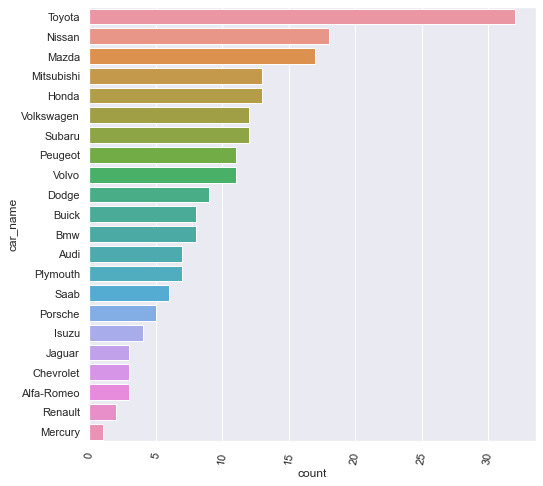

In [81]:
plot = sns.barplot(y='car_name',x='count',data=cam)
plot=plt.setp(plot.get_xticklabels(), rotation=80)

. Toyota is the most suitable car
. mercury is the least suitable car

# fuel type used by the cars

In [82]:
cam=pd.DataFrame(code['fueltype'].value_counts())

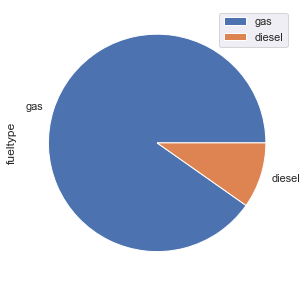

In [83]:
plot = cam.plot.pie(y='fueltype', figsize=(5, 5))

most cars uses gas fuel

# Price distribution of cars

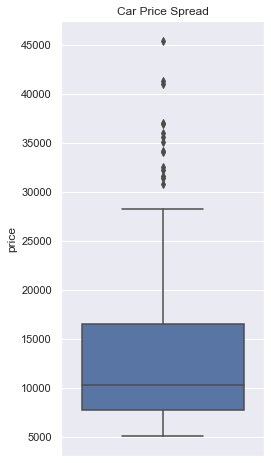

In [84]:

plt.subplot(1,2,2)
plt.title('Car Price Spread')
sns.boxplot(y=code.price)

plt.show()

<AxesSubplot:xlabel='price', ylabel='Density'>

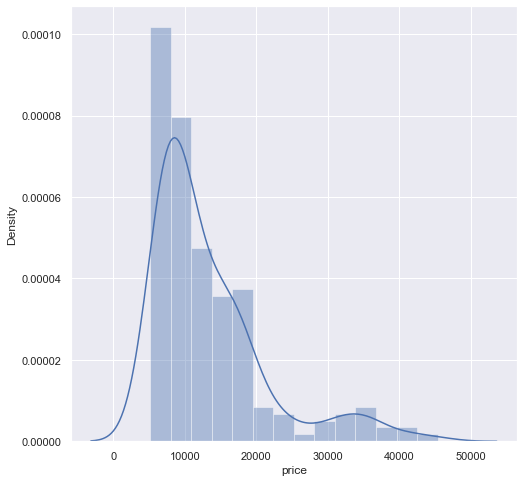

In [85]:
sns.distplot(code['price'],kde=True)

Price distribution plot is right skewed
most number of cars are within thr range of 20000

# Aspiration ratio

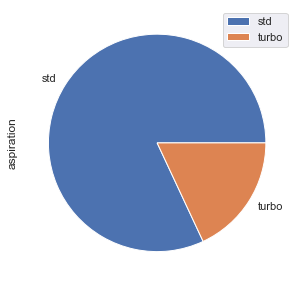

In [86]:
cam=pd.DataFrame(code['aspiration'].value_counts())
plot = cam.plot.pie(y='aspiration', figsize=(5, 5))

# SYMBOLING

<AxesSubplot:title={'center':'Symboling Histogram'}, xlabel='symboling', ylabel='count'>

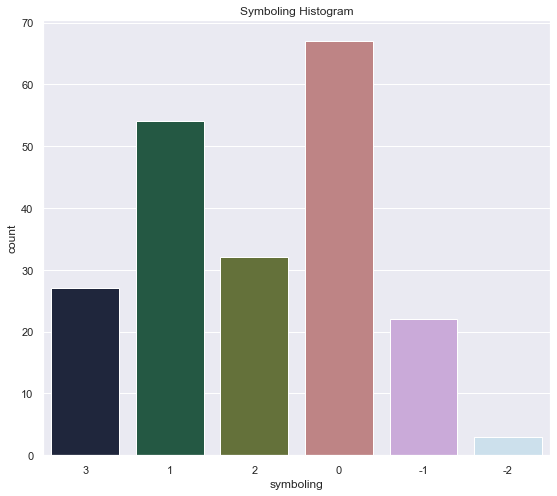

In [87]:
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.title('Symboling Histogram')
sns.countplot(code.symboling, palette=("cubehelix"))

# ENGINE TYPE

<AxesSubplot:title={'center':'Door Number Histogram'}, xlabel='enginetype', ylabel='count'>

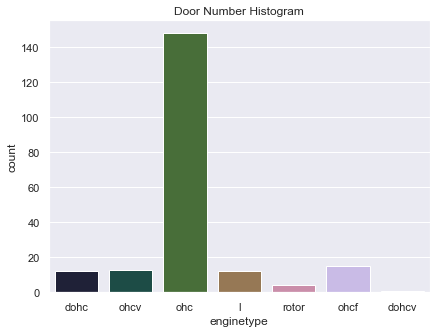

In [88]:
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
plt.title('Door Number Histogram')
sns.countplot(code.enginetype, palette=("cubehelix"))

- most cars use ohc engine 

# DOOR NUMBER


<AxesSubplot:title={'center':'Door Number Histogram'}, xlabel='doornumber', ylabel='count'>

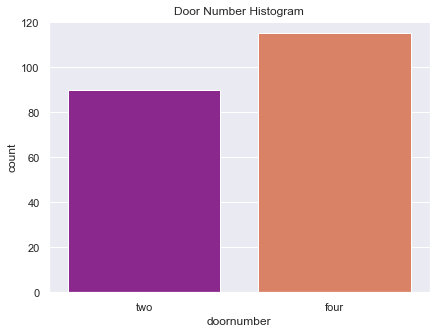

In [89]:
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
plt.title('Door Number Histogram')
sns.countplot(code.doornumber, palette=("plasma"))

- most of the cars has four doors
- other cars has two doors 

# CYLINDER NUMBER

<AxesSubplot:title={'center':'Door Number Histogram'}, xlabel='cylindernumber', ylabel='count'>

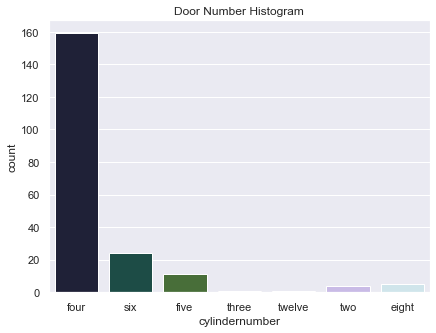

In [90]:
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
plt.title('Door Number Histogram')
sns.countplot(code.cylindernumber, palette=("cubehelix"))

- majority of the cars uses four cylinders 

# CAR BODY

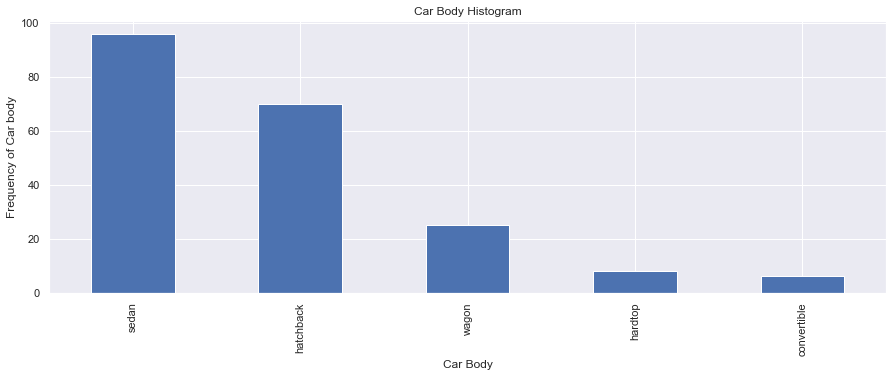

In [91]:
"""plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
plt.title('Door Number Histogram')
sns.countplot(code.carbody, palette=("plasma"))"""

plt.figure(figsize=(15,5))
plt1 = code.carbody.value_counts().plot(kind='bar')
plt.title('Car Body Histogram')
plt1.set(xlabel = 'Car Body', ylabel='Frequency of Car body')

plt.show()

- most prefered and used car body is sedan then hatchback

# ENGINE LOCATION

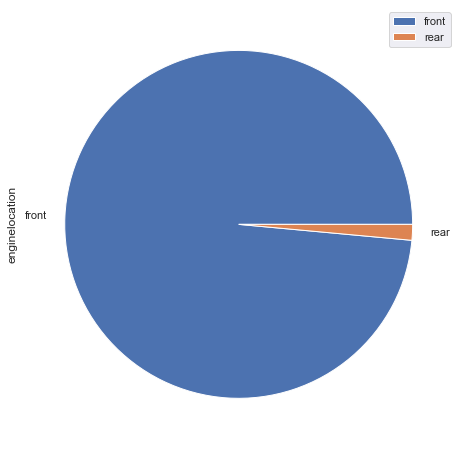

In [92]:
cam=pd.DataFrame(code['enginelocation'].value_counts())
plot = cam.plot.pie(y='enginelocation', figsize=(8, 8))

- most cars have their engines in front

# DRIVE WHEEL

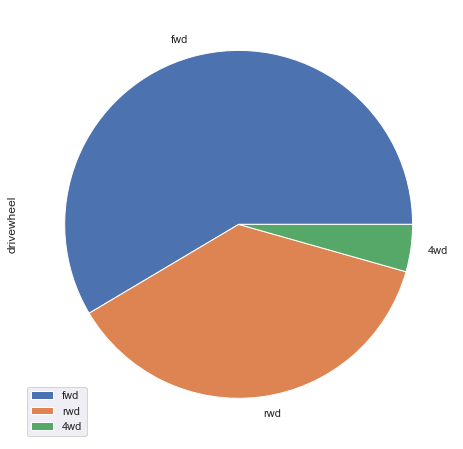

In [93]:
cam=pd.DataFrame(code['drivewheel'].value_counts())
plot = cam.plot.pie(y='drivewheel', figsize=(8, 8))

# 2 BIVARIATE ANALYSIS

# FUEL TYPE VS PRICE

<AxesSubplot:xlabel='fueltype', ylabel='price'>

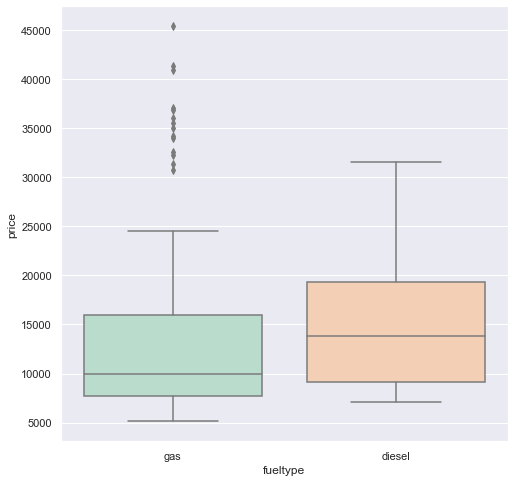

In [94]:
sns.boxplot(x = 'fueltype', y = 'price', data = code,palette='Pastel2')

# ASPIRATION VS PRICE

<AxesSubplot:xlabel='aspiration', ylabel='price'>

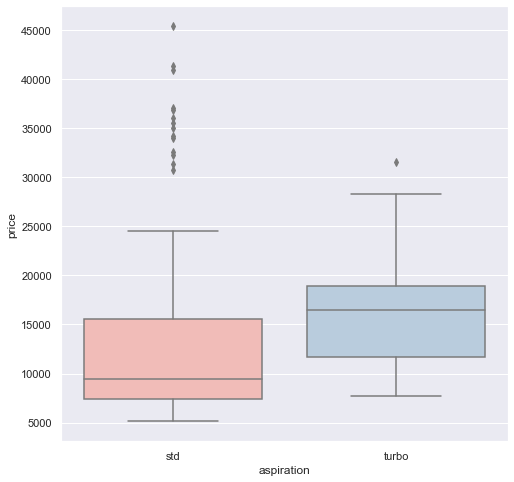

In [95]:
sns.boxplot(x = 'aspiration', y = 'price', data = code,palette='Pastel1')

- thou there are some outliers in std, turbo is higher when compared to std

# DOOR NUMBER VS PRICE

<AxesSubplot:xlabel='doornumber', ylabel='price'>

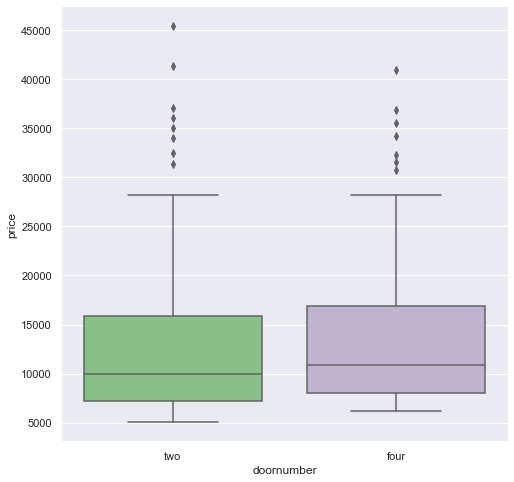

In [96]:
sns.boxplot(x = 'doornumber', y = 'price', data = code,palette='Accent')

# ENGINE TYPE VS PRICE

<AxesSubplot:xlabel='enginetype', ylabel='price'>

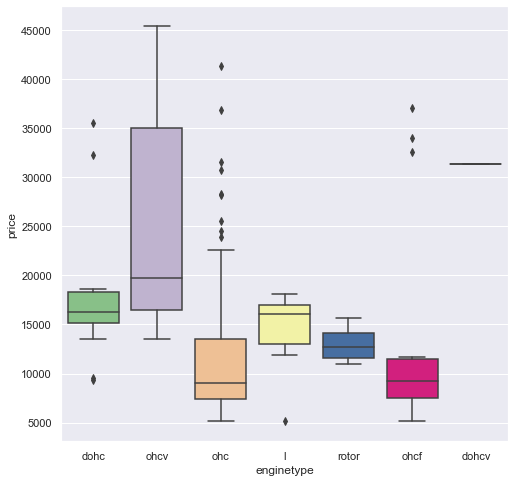

In [97]:
sns.boxplot(x = 'enginetype', y = 'price', data = code,palette='Accent')

- ohcv engine cars Prices are quite high in compare to other

# CAR BODY VS PRICE

<AxesSubplot:xlabel='carbody', ylabel='price'>

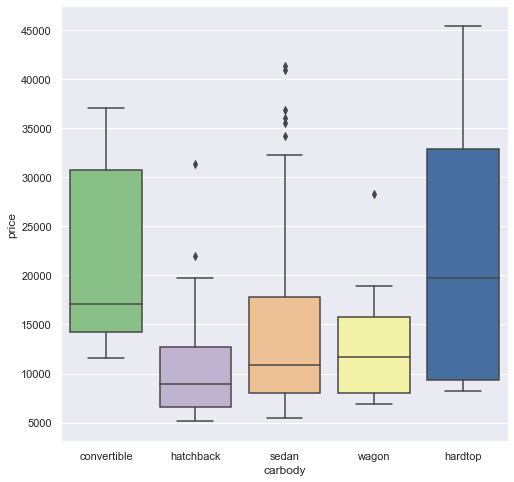

In [98]:
sns.boxplot(x = 'carbody', y = 'price', data = code,palette='Accent')

- price of hardtop is very high compare to others

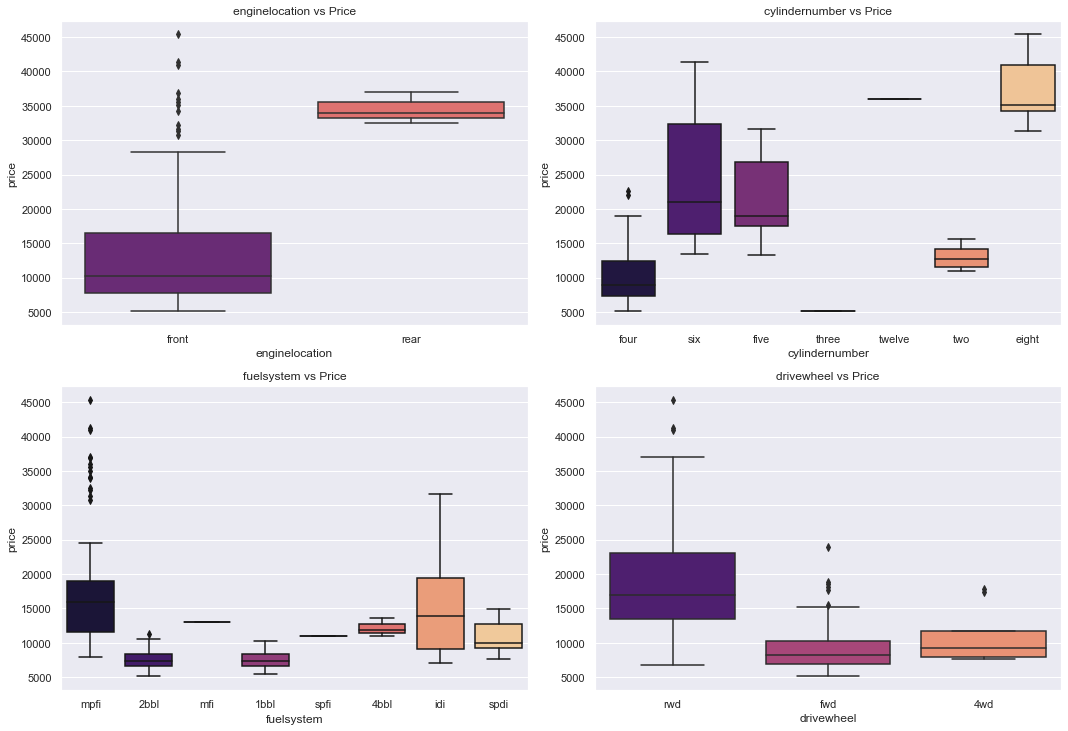

In [99]:
def plot_count(x,fig):
    plt.subplot(4,2,fig)
    #plt.title(x+' Histogram')
    #sns.countplot(df[x],palette=("magma"))
    #plt.subplot(4,2,(fig+1))
    plt.title(x+' vs Price')
    sns.boxplot(x=code[x], y=code.price, palette=("magma"))
    
plt.figure(figsize=(15,20))

plot_count('enginelocation', 1)
plot_count('cylindernumber', 2)
plot_count('fuelsystem', 3)
plot_count('drivewheel', 4)

plt.tight_layout()

- the highest price range are for Fuel system VS price  mpfi and idi are having 

#  Numerical Features

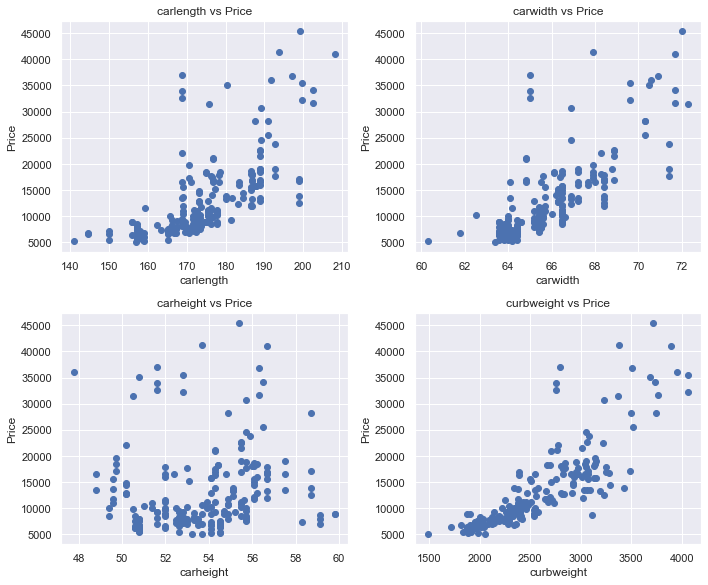

In [100]:
def scatter(x,fig):
    plt.subplot(5,2,fig)
    plt.scatter(code[x],code['price'])
    plt.title(x+' vs Price')
    plt.ylabel('Price')
    plt.xlabel(x)

plt.figure(figsize=(10,20))

scatter('carlength', 1)
scatter('carwidth', 2)
scatter('carheight', 3)
scatter('curbweight', 4)

plt.tight_layout()

- Carwidth, carlength and curbweight s have a poitive correlation with price.

- Carheight doesn't show any significant trend with price

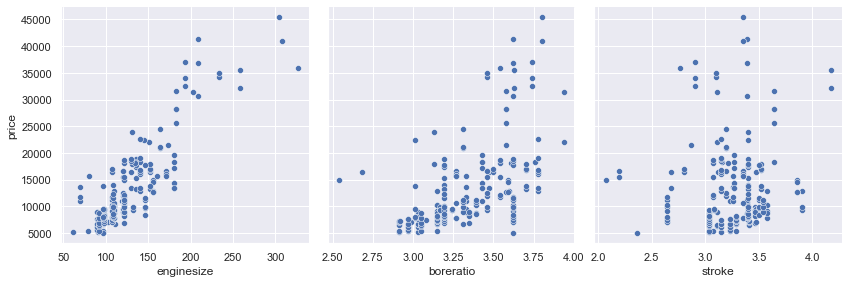

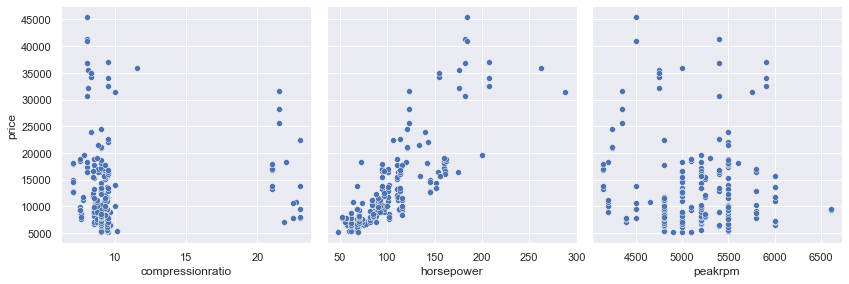

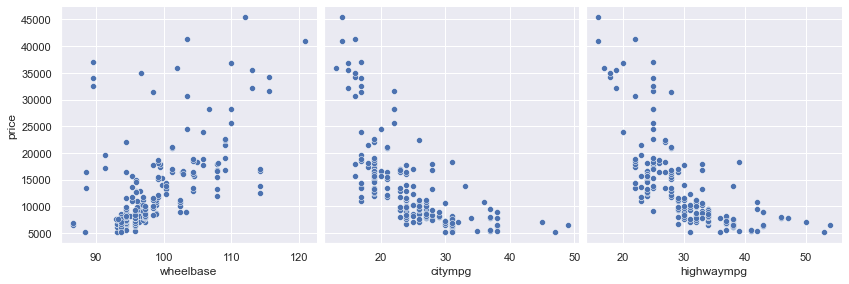

In [104]:
def pp(x,y,z):
    sns.pairplot(code, x_vars=[x,y,z], y_vars='price',height=4, aspect=1, kind='scatter')
    plt.show()

pp('enginesize', 'boreratio', 'stroke')
pp('compressionratio', 'horsepower', 'peakrpm')
pp('wheelbase', 'citympg', 'highwaympg')

- Enginesize, boreratio, horsepower, wheelbase - seem to have a significant positive correlation with price.

- Citympg, highwaympg - seem to have a negative correlation with price.

# CORRELATION MATRIX

In [105]:
code[numerical_cols].corr()

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
wheelbase,1.000000,0.874587,0.795144,0.589435,0.776386,0.569329,0.488750,0.160959,0.249786,0.353294,-0.360469,-0.470414,-0.544082,0.577816
carlength,0.874587,1.000000,0.841118,0.491029,0.877728,0.683360,0.606454,0.129533,0.158414,0.552623,-0.287242,-0.670909,-0.704662,0.682920
carwidth,0.795144,0.841118,1.000000,0.279210,0.867032,0.735433,0.559150,0.182942,0.181129,0.640732,-0.220012,-0.642704,-0.677218,0.759325
carheight,0.589435,0.491029,0.279210,1.000000,0.295572,0.067149,0.171071,-0.055307,0.261214,-0.108802,-0.320411,-0.048640,-0.107358,0.119336
curbweight,0.776386,0.877728,0.867032,0.295572,1.000000,0.850594,0.648480,0.168790,0.151362,0.750739,-0.266243,-0.757414,-0.797465,0.835305
enginesize,0.569329,0.683360,0.735433,0.067149,0.850594,1.000000,0.583774,0.203129,0.028971,0.809769,-0.244660,-0.653658,-0.677470,0.874145
boreratio,0.488750,0.606454,0.559150,0.171071,0.648480,0.583774,1.000000,-0.055909,0.005197,0.573677,-0.254976,-0.584532,-0.587012,0.553173
stroke,0.160959,0.129533,0.182942,-0.055307,0.168790,0.203129,-0.055909,1.000000,0.186110,0.080940,-0.067964,-0.042145,-0.043931,0.079443
compressionratio,0.249786,0.158414,0.181129,0.261214,0.151362,0.028971,0.005197,0.186110,1.000000,-0.204326,-0.435741,0.324701,0.265201,0.067984
horsepower,0.353294,0.552623,0.640732,-0.108802,0.750739,0.809769,0.573677,0.080940,-0.204326,1.000000,0.131073,-0.801456,-0.770544,0.808139


<AxesSubplot:>

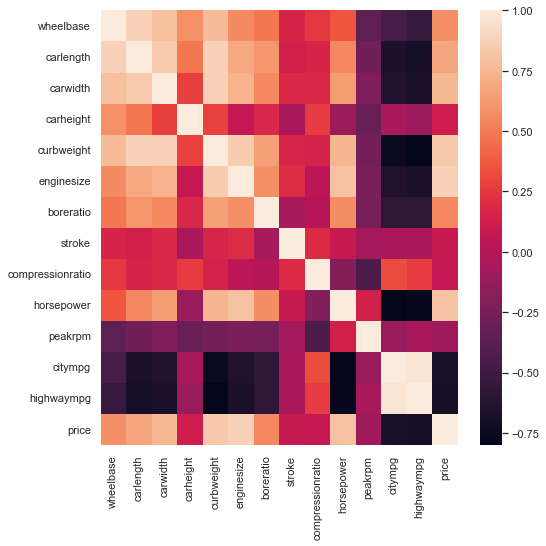

In [106]:
sns.heatmap(code[numerical_cols].corr())

- enginesize has high positive correlation with horsepower
- curbweight has high positive correlation with engine size and horse power, negative correlation with highwaympg
- horsepower has negative correlation with citympg and highwaympg
- citympg and highwaympg are highly correlated
- carlength has high postive correlation with curbweight
- carlength has negative correlation with highwaympg
- carwidth has high postive correlation with curbweight and engine size

# Feature Selection

- Feature selection methods are intended to reduce the number of input variables to those that are believed to be most useful to a model in order to predict the target variable.

In [107]:
X=code[numerical_cols].drop('price',axis=1)
y=code['price']

# Recursive feature elimination (RFE) with random forest


In [108]:
X = code.apply(lambda col: preprocessing.LabelEncoder().fit_transform(col))
X=X.drop(['CarName','price'],axis=1)
y=code['price']

In [109]:
# Create the RFE object and rank each pixel
clf_rf_3 = RandomForestRegressor()      
rfe = RFE(estimator=clf_rf_3, n_features_to_select=15, step=1)
rfe = rfe.fit(X, y)
print('Chosen best 15 feature by rfe:',X.columns[rfe.support_])


Chosen best 15 feature by rfe: Index(['carbody', 'wheelbase', 'carlength', 'carwidth', 'carheight',
       'curbweight', 'enginesize', 'boreratio', 'stroke', 'compressionratio',
       'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'CarBrand'],
      dtype='object')


In [110]:
features=list(X.columns[rfe.support_])

# Data Modelling and Evaluation 

In [111]:
x = X[features]
y = code.price
x_train,x_test,y_train,y_test = train_test_split(x,y, random_state = 0)

# Linear Regression

In [114]:
lreg = linear_model.LinearRegression()
lreg.fit(x_train,y_train)
#y_train_pred = lreg.predict(x_train)
y_test_pred = lreg.predict(x_test)
y_test_pred 

array([ 6968.39447042, 20225.78397077, 17259.52133217,  5231.27179812,
       11614.38156497, 14437.66335574,  6084.46466192,  4748.48168786,
       23818.60512059,  8297.2669119 , 22018.38711667, 32024.55230983,
       11554.28787966, 14396.73841801,  7551.69486312, 13900.97891813,
        7978.88521035, 19458.54567732, 10477.23965231,  5825.124687  ,
        8854.59403548, 17087.81282705,  8616.76680201, 13973.17169499,
       22466.5512177 ,  6524.34030934,  6148.61565788, 16191.36213749,
        6978.29484908,  5948.38253445,  7751.43319792,  7460.74006482,
       23603.23875032,  9057.16318545,  5984.47892288, 25552.85969591,
        8969.27317848, 18560.56828946,  7595.1148472 , 30287.86034921,
        7515.59847469, 17712.8077152 , 29981.26878588, 17839.161087  ,
       10276.56321214,  5108.38893819,  7154.98184425, 15244.47877369,
        8948.65008992,  7805.57778056, 21078.56706054,  5351.69448876])

In [115]:
lreg.score(x_test,y_test)

0.8034568463752468

# Decision Tree Regressor

In [116]:
dt_regressor = DecisionTreeRegressor(random_state=0)
dt_regressor.fit(x_train,y_train)
y_train_pred = dt_regressor.predict(x_train)
y_test_pred = dt_regressor.predict(x_test)
dt_regressor.score(x_test,y_test)

0.8591188137491917

# Random Forest Regressor

In [117]:
Rf = RandomForestRegressor(n_estimators = 15,
                              criterion = 'mse',
                              random_state = 20,
                              n_jobs = -1)
Rf.fit(x_train,y_train)
Rf_train_pred = Rf.predict(x_train)
Rf_test_pred = Rf.predict(x_test)


r2_score(y_test,Rf_test_pred)

0.9129541993611439

# Conclusion

- We applied three models Linear Regression Decision Tree Regressor,and RandomForest Regressor
- As we can see random forest performing best (with accuracy ~ 0.90)